In [1]:
#Library

import pandas as pd
import numpy as np
import os
import glob
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

# Data Exploration and Processing

In [20]:
#load the dataset
#After reading the datasets as instructed,
#we will concatenate all of them to be able to apply all transformations in the entire DataFrame. 
#Let's investigate the complete dataset to see what we are dealing with.

train_df=pd.read_json(r"C:\Users\Satya Meen\Desktop\Ds\Data Science\laptop price file\train_dataset.json")
test_df=pd.read_json(r"C:\Users\Satya Meen\Desktop\Ds\Data Science\laptop price file\test_dataset.json")
val_df=pd.read_json(r"C:\Users\Satya Meen\Desktop\Ds\Data Science\laptop price file\val_dataset.json")


df = pd.concat([train_df, val_df, test_df], axis=0)
df.head(10)

,graphic card type,communications,resolution (px),CPU cores,RAM size,operating system,drive type,input devices,multimedia,RAM type,CPU clock speed (GHz),CPU model,state,drive memory size (GB),warranty,screen size,buynow_price
7233,dedicated graphics,"[bluetooth, lan 10/100/1000 mbps]",1920 x 1080,4,32 gb,[no system],ssd + hdd,"[keyboard, touchpad, illuminated keyboard, num...","[SD card reader, camera, speakers, microphone]",ddr4,2.6,intel core i7,new,1250.0,producer warranty,"17"" - 17.9""",4999.0
5845,dedicated graphics,"[wi-fi, bluetooth, lan 10/100 mbps]",1366 x 768,4,8 gb,[windows 10 home],ssd,"[keyboard, touchpad, numeric keyboard]","[SD card reader, camera, speakers, microphone]",ddr3,2.4,intel core i7,new,256.0,seller warranty,"15"" - 15.9""",2649.0
10303,None,"[bluetooth, nfc (near field communication)]",1920 x 1080,2,8 gb,[windows 10 home],hdd,None,[SD card reader],ddr4,1.6,intel core i7,new,1000.0,producer warranty,"15"" - 15.9""",3399.0
10423,None,None,None,2,None,None,None,None,None,None,NaN,None,new,NaN,producer warranty,None,1599.0
5897,integrated graphics,"[wi-fi, bluetooth]",2560 x 1440,4,8 gb,[windows 10 home],ssd,"[keyboard, touchpad, illuminated keyboard]","[SD card reader, camera, speakers, microphone]",ddr4,1.2,other CPU,new,256.0,producer warranty,"12"" - 12.9""",4499.0
4870,integrated graphics,"[wi-fi, bluetooth, lan 10/100 mbps]",1366 x 768,2,8 gb,[windows 10 home],hdd,"[keyboard, touchpad, numeric keyboard]","[SD card reader, camera, speakers, microphone]",ddr4,2.0,intel core i3,new,1000.0,producer warranty,"15"" - 15.9""",2099.0
2498,dedicated graphics,"[wi-fi, bluetooth, lan 10/100/1000 mbps]",1920 x 1080,4,8 gb,"[windows 8.1 home 64-bit, other]",hdd,"[keyboard, touchpad, illuminated keyboard, num...","[SD card reader, camera, speakers, microphone]",ddr3,2.4,intel core i7,new,1000.0,producer warranty,"17"" - 17.9""",2699.0
6220,dedicated graphics,"[wi-fi, bluetooth, lan 10/100/1000 mbps]",1920 x 1080,4,8 gb,[no system],ssd,"[keyboard, touchpad, illuminated keyboard, num...","[SD card reader, camera, speakers, microphone]",ddr4,2.5,intel core i5,new,256.0,producer warranty,"15"" - 15.9""",3199.0
10594,integrated graphics,"[nfc (near field communication), gps]",1920 x 1080,2,8 gb,[windows 10 professional],None,[touchpad],[SD card reader],ddr4,2.5,intel core i5,new,500.0,producer warranty,"15"" - 15.9""",2749.0
11640,integrated graphics,"[wi-fi 802.11 b/g/n/ac, bluetooth, lan 10/100/...",1920 x 1080,2,8 gb,[windows 10 professional],ssd,"[keyboard, touchpad, numeric keyboard]","[SD card reader, camera, speakers, microphone]",ddr4,2.5,intel core i5,new,256.0,producer warranty,"15"" - 15.9""",3199.0


In [21]:
df.dtypes

graphic card type          object
communications             object
resolution (px)            object
CPU cores                  object
RAM size                   object
operating system           object
drive type                 object
input devices              object
multimedia                 object
RAM type                   object
CPU clock speed (GHz)     float64
CPU model                  object
state                      object
drive memory size (GB)    float64
warranty                   object
screen size                object
buynow_price              float64
dtype: object

In [22]:
df.shape

(7853, 17)

In [23]:
for col in df.columns.to_list():
    if type(df[col][0]) != list:
        print(f"unique values of {col} are: ", df[col].unique())
        print("-----------------------------------------------------")

unique values of graphic card type are:  ['dedicated graphics' None 'integrated graphics']
-----------------------------------------------------
unique values of resolution (px) are:  ['1920 x 1080' '1366 x 768' None '2560 x 1440' '1600 x 900' '3840 x 2160'
 'other' '1920 x 1280' '1280 x 800' '3200 x 1800' '2880 x 1620'
 '2160 x 1440' '1920 x 1200' '2560 x 1600']
-----------------------------------------------------
unique values of CPU cores are:  ['4' '2' 'not applicable' '3' '1' '8' '6']
-----------------------------------------------------
unique values of RAM size are:  ['32 gb' '8 gb' None '12 gb' '4 gb' '16 gb' '2 gb' '20 gb' '6 gb' '64 gb'
 '256 mb' '24 gb']
-----------------------------------------------------
unique values of drive type are:  ['ssd + hdd' 'ssd' 'hdd' None 'emmc' 'hybrid']
-----------------------------------------------------
unique values of RAM type are:  ['ddr4' 'ddr3' None 'ddr3l']
-----------------------------------------------------
unique values of CPU 

# With the above output, we realise the following points:

Our intuition about state was correct. We can drop it.
There are several columns to include None and nan values. We can not process them in a machine learning model. We will drop it since we don't have a solid knowledge to fill it all.
Most of the values are categorical variables. When we split the columns with list values, it will add more. We may have a sparse dataset.
This is a regression problem and the dataset includes many features that could be related to each other such as keyboard and touchpad. When the existence or quantity of a feature depends on or is highly correlated with each other, multicollinearity presents. It is a potential problem that could hurt the performance of regression models. We need to check this before moving to the regression stage

In [24]:
#  state only takes one value we can drop this column since it won't effect the price
df = df.drop(columns=['state'])
df = df.dropna()

Now, we will deal with features that include multiple values in a cell. Let's define these features in a list. We will use it.

In [25]:
compact_cols = ['communications', 'input devices', 'multimedia']

In [26]:
pd.DataFrame(df['communications'].to_list())

,0,1,2,3,4,5
0,bluetooth,lan 10/100/1000 mbps,None,None,None,None
1,wi-fi,bluetooth,lan 10/100 mbps,None,None,None
2,wi-fi,bluetooth,None,None,None,None
3,wi-fi,bluetooth,lan 10/100 mbps,None,None,None
4,wi-fi,bluetooth,lan 10/100/1000 mbps,None,None,None
...,...,...,...,...,...,...
6104,wi-fi,bluetooth,lan 10/100/1000 mbps,None,None,None
6105,bluetooth,lan 10/100 mbps,None,None,None,None
6106,wi-fi,bluetooth,lan 10/100/1000 mbps,None,None,None
6107,bluetooth,lan 10/100 mbps,None,None,None,None


Then, we will find unique values in the entire DataFrame with the following function. We will search through the DataFrame and add a feature to the unique_vals list when it is not included before.

In [27]:
def get_unique_vals(col_name):
    #to_list function splits each comma separated value to a new column   
    col_df = pd.DataFrame(df[col_name].to_list())
    unique_vals = list()
    for col in col_df.columns.to_list():
        unique_vals += [val for val in list(col_df[col].unique()) if (val not in unique_vals and val is not None) ]

    return unique_vals

We will repeat this process for each feature in compact_cols and store new column names in a dictionary to use later.

In [28]:
compact_dict = {col: [] for  col in compact_cols}

for col in compact_cols:
    compact_dict[col] = get_unique_vals(col)

In [30]:
compact_dict

{'communications': ['bluetooth',
  'wi-fi',
  'wi-fi 802.11 b/g/n/ac',
  'lan 10/100 mbps',
  'wi-fi 802.11 a/b/g/n/ac',
  'nfc (near field communication)',
  'lan 10/100/1000 mbps',
  'gps',
  'wi-fi 802.11 b/g/n',
  'intel wireless display (widi)',
  'wi-fi 802.11 a/b/g/n',
  'modem 3g (wwan)',
  'modem 4g (lte)'],
 'input devices': ['keyboard',
  'touchpad',
  'illuminated keyboard',
  'numeric keyboard'],
 'multimedia': ['SD card reader', 'camera', 'microphone', 'speakers']}

Okay, cool. We got what we needed. Now, we are moving to numerical columns. We need to convert them to float. However, we need to take care of gb and mb words in cells. We do not need them, so we will simply replace them with empty strings.

In [31]:
df['RAM size'] = df['RAM size'].str.replace(' gb','',regex=True)
# when regex=False, replace requires exact match
df['RAM size'] = df['RAM size'].str.replace('256 mb','0.256',regex=False)
df

,graphic card type,communications,resolution (px),CPU cores,RAM size,operating system,drive type,input devices,multimedia,RAM type,CPU clock speed (GHz),CPU model,drive memory size (GB),warranty,screen size,buynow_price
7233,dedicated graphics,"[bluetooth, lan 10/100/1000 mbps]",1920 x 1080,4,32,[no system],ssd + hdd,"[keyboard, touchpad, illuminated keyboard, num...","[SD card reader, camera, speakers, microphone]",ddr4,2.6,intel core i7,1250.0,producer warranty,"17"" - 17.9""",4999.00
5845,dedicated graphics,"[wi-fi, bluetooth, lan 10/100 mbps]",1366 x 768,4,8,[windows 10 home],ssd,"[keyboard, touchpad, numeric keyboard]","[SD card reader, camera, speakers, microphone]",ddr3,2.4,intel core i7,256.0,seller warranty,"15"" - 15.9""",2649.00
5897,integrated graphics,"[wi-fi, bluetooth]",2560 x 1440,4,8,[windows 10 home],ssd,"[keyboard, touchpad, illuminated keyboard]","[SD card reader, camera, speakers, microphone]",ddr4,1.2,other CPU,256.0,producer warranty,"12"" - 12.9""",4499.00
4870,integrated graphics,"[wi-fi, bluetooth, lan 10/100 mbps]",1366 x 768,2,8,[windows 10 home],hdd,"[keyboard, touchpad, numeric keyboard]","[SD card reader, camera, speakers, microphone]",ddr4,2.0,intel core i3,1000.0,producer warranty,"15"" - 15.9""",2099.00
2498,dedicated graphics,"[wi-fi, bluetooth, lan 10/100/1000 mbps]",1920 x 1080,4,8,"[windows 8.1 home 64-bit, other]",hdd,"[keyboard, touchpad, illuminated keyboard, num...","[SD card reader, camera, speakers, microphone]",ddr3,2.4,intel core i7,1000.0,producer warranty,"17"" - 17.9""",2699.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9211,dedicated graphics,"[wi-fi, bluetooth, lan 10/100/1000 mbps]",1920 x 1080,4,32,[windows 10 home],ssd,"[keyboard, touchpad, illuminated keyboard, num...","[SD card reader, camera, speakers, microphone]",ddr4,2.8,intel core i7,500.0,producer warranty,"15"" - 15.9""",5599.00
2748,dedicated graphics,"[bluetooth, lan 10/100 mbps]",1600 x 900,4,8,[windows 10 home],hdd,"[keyboard, touchpad, numeric keyboard]","[SD card reader, camera, speakers, microphone]",ddr3,2.2,intel core i7,1000.0,seller warranty,"17"" - 17.9""",2925.36
2072,dedicated graphics,"[wi-fi, bluetooth, lan 10/100/1000 mbps]",1920 x 1080,4,8,[no system],ssd + hdd,"[keyboard, touchpad, illuminated keyboard, num...","[SD card reader, camera, speakers, microphone]",ddr4,2.6,intel core i7,1120.0,producer warranty,"17"" - 17.9""",3799.00
4741,dedicated graphics,"[bluetooth, lan 10/100 mbps]",1920 x 1080,4,12,[no system],ssd + hdd,"[keyboard, touchpad, illuminated keyboard]","[SD card reader, camera, speakers, microphone]",ddr4,2.8,intel core i7,1256.0,producer warranty,"15"" - 15.9""",5589.00


screen size column is given as intervals. We can convert it as integers such as so 11.9" and less would become 11, 12" - 12.9" would be 12, 13" - 13.9" would be 13 and so on. Since all these values are given in the first two characters of the column current values, we can extract them by using string indexing.

In [32]:
df['screen size'] = df['screen size'].apply(lambda x: int(str(x)[:2]))
df

,graphic card type,communications,resolution (px),CPU cores,RAM size,operating system,drive type,input devices,multimedia,RAM type,CPU clock speed (GHz),CPU model,drive memory size (GB),warranty,screen size,buynow_price
7233,dedicated graphics,"[bluetooth, lan 10/100/1000 mbps]",1920 x 1080,4,32,[no system],ssd + hdd,"[keyboard, touchpad, illuminated keyboard, num...","[SD card reader, camera, speakers, microphone]",ddr4,2.6,intel core i7,1250.0,producer warranty,17,4999.00
5845,dedicated graphics,"[wi-fi, bluetooth, lan 10/100 mbps]",1366 x 768,4,8,[windows 10 home],ssd,"[keyboard, touchpad, numeric keyboard]","[SD card reader, camera, speakers, microphone]",ddr3,2.4,intel core i7,256.0,seller warranty,15,2649.00
5897,integrated graphics,"[wi-fi, bluetooth]",2560 x 1440,4,8,[windows 10 home],ssd,"[keyboard, touchpad, illuminated keyboard]","[SD card reader, camera, speakers, microphone]",ddr4,1.2,other CPU,256.0,producer warranty,12,4499.00
4870,integrated graphics,"[wi-fi, bluetooth, lan 10/100 mbps]",1366 x 768,2,8,[windows 10 home],hdd,"[keyboard, touchpad, numeric keyboard]","[SD card reader, camera, speakers, microphone]",ddr4,2.0,intel core i3,1000.0,producer warranty,15,2099.00
2498,dedicated graphics,"[wi-fi, bluetooth, lan 10/100/1000 mbps]",1920 x 1080,4,8,"[windows 8.1 home 64-bit, other]",hdd,"[keyboard, touchpad, illuminated keyboard, num...","[SD card reader, camera, speakers, microphone]",ddr3,2.4,intel core i7,1000.0,producer warranty,17,2699.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9211,dedicated graphics,"[wi-fi, bluetooth, lan 10/100/1000 mbps]",1920 x 1080,4,32,[windows 10 home],ssd,"[keyboard, touchpad, illuminated keyboard, num...","[SD card reader, camera, speakers, microphone]",ddr4,2.8,intel core i7,500.0,producer warranty,15,5599.00
2748,dedicated graphics,"[bluetooth, lan 10/100 mbps]",1600 x 900,4,8,[windows 10 home],hdd,"[keyboard, touchpad, numeric keyboard]","[SD card reader, camera, speakers, microphone]",ddr3,2.2,intel core i7,1000.0,seller warranty,17,2925.36
2072,dedicated graphics,"[wi-fi, bluetooth, lan 10/100/1000 mbps]",1920 x 1080,4,8,[no system],ssd + hdd,"[keyboard, touchpad, illuminated keyboard, num...","[SD card reader, camera, speakers, microphone]",ddr4,2.6,intel core i7,1120.0,producer warranty,17,3799.00
4741,dedicated graphics,"[bluetooth, lan 10/100 mbps]",1920 x 1080,4,12,[no system],ssd + hdd,"[keyboard, touchpad, illuminated keyboard]","[SD card reader, camera, speakers, microphone]",ddr4,2.8,intel core i7,1256.0,producer warranty,15,5589.00


For the resolution (px) column since there are always 2 values, we can split this column into two columns of integers (resolution_x and resolution_y), so that e.g. 1280 x 800 would have 1280 in the first column and 800 in the second column. Let's do it and check our result with its original value. We will split string values of this column as before and after " x " to assign different columns.

In [33]:
df['resolution_x'] = df['resolution (px)'].apply(lambda x: x.split(' x ')[0]).astype(int)
df['resolution_y'] = df['resolution (px)'].apply(lambda x: x.split(' x ')[1]).astype(int)
df

,graphic card type,communications,resolution (px),CPU cores,RAM size,operating system,drive type,input devices,multimedia,RAM type,CPU clock speed (GHz),CPU model,drive memory size (GB),warranty,screen size,buynow_price,resolution_x,resolution_y
7233,dedicated graphics,"[bluetooth, lan 10/100/1000 mbps]",1920 x 1080,4,32,[no system],ssd + hdd,"[keyboard, touchpad, illuminated keyboard, num...","[SD card reader, camera, speakers, microphone]",ddr4,2.6,intel core i7,1250.0,producer warranty,17,4999.00,1920,1080
5845,dedicated graphics,"[wi-fi, bluetooth, lan 10/100 mbps]",1366 x 768,4,8,[windows 10 home],ssd,"[keyboard, touchpad, numeric keyboard]","[SD card reader, camera, speakers, microphone]",ddr3,2.4,intel core i7,256.0,seller warranty,15,2649.00,1366,768
5897,integrated graphics,"[wi-fi, bluetooth]",2560 x 1440,4,8,[windows 10 home],ssd,"[keyboard, touchpad, illuminated keyboard]","[SD card reader, camera, speakers, microphone]",ddr4,1.2,other CPU,256.0,producer warranty,12,4499.00,2560,1440
4870,integrated graphics,"[wi-fi, bluetooth, lan 10/100 mbps]",1366 x 768,2,8,[windows 10 home],hdd,"[keyboard, touchpad, numeric keyboard]","[SD card reader, camera, speakers, microphone]",ddr4,2.0,intel core i3,1000.0,producer warranty,15,2099.00,1366,768
2498,dedicated graphics,"[wi-fi, bluetooth, lan 10/100/1000 mbps]",1920 x 1080,4,8,"[windows 8.1 home 64-bit, other]",hdd,"[keyboard, touchpad, illuminated keyboard, num...","[SD card reader, camera, speakers, microphone]",ddr3,2.4,intel core i7,1000.0,producer warranty,17,2699.00,1920,1080
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9211,dedicated graphics,"[wi-fi, bluetooth, lan 10/100/1000 mbps]",1920 x 1080,4,32,[windows 10 home],ssd,"[keyboard, touchpad, illuminated keyboard, num...","[SD card reader, camera, speakers, microphone]",ddr4,2.8,intel core i7,500.0,producer warranty,15,5599.00,1920,1080
2748,dedicated graphics,"[bluetooth, lan 10/100 mbps]",1600 x 900,4,8,[windows 10 home],hdd,"[keyboard, touchpad, numeric keyboard]","[SD card reader, camera, speakers, microphone]",ddr3,2.2,intel core i7,1000.0,seller warranty,17,2925.36,1600,900
2072,dedicated graphics,"[wi-fi, bluetooth, lan 10/100/1000 mbps]",1920 x 1080,4,8,[no system],ssd + hdd,"[keyboard, touchpad, illuminated keyboard, num...","[SD card reader, camera, speakers, microphone]",ddr4,2.6,intel core i7,1120.0,producer warranty,17,3799.00,1920,1080
4741,dedicated graphics,"[bluetooth, lan 10/100 mbps]",1920 x 1080,4,12,[no system],ssd + hdd,"[keyboard, touchpad, illuminated keyboard]","[SD card reader, camera, speakers, microphone]",ddr4,2.8,intel core i7,1256.0,producer warranty,15,5589.00,1920,1080


Since we divided resolution (px) into resolution_x and resolution_y, we can drop resolution (px) now.

In [34]:
df = df.drop(columns=['resolution (px)'])

In [35]:
df.dtypes

graphic card type          object
communications             object
CPU cores                  object
RAM size                   object
operating system           object
drive type                 object
input devices              object
multimedia                 object
RAM type                   object
CPU clock speed (GHz)     float64
CPU model                  object
drive memory size (GB)    float64
warranty                   object
screen size                 int64
buynow_price              float64
resolution_x                int32
resolution_y                int32
dtype: object

Put all numerical columns together

In [36]:
numerical_cols = ['CPU cores', 'RAM size', 'CPU clock speed (GHz)','drive memory size (GB)', 'screen size', 'resolution_x', 'resolution_y']
numerical_df = df[numerical_cols].astype(float)
numerical_df

,CPU cores,RAM size,CPU clock speed (GHz),drive memory size (GB),screen size,resolution_x,resolution_y
7233,4.0,32.0,2.6,1250.0,17.0,1920.0,1080.0
5845,4.0,8.0,2.4,256.0,15.0,1366.0,768.0
5897,4.0,8.0,1.2,256.0,12.0,2560.0,1440.0
4870,2.0,8.0,2.0,1000.0,15.0,1366.0,768.0
2498,4.0,8.0,2.4,1000.0,17.0,1920.0,1080.0
...,...,...,...,...,...,...,...
9211,4.0,32.0,2.8,500.0,15.0,1920.0,1080.0
2748,4.0,8.0,2.2,1000.0,17.0,1600.0,900.0
2072,4.0,8.0,2.6,1120.0,17.0,1920.0,1080.0
4741,4.0,12.0,2.8,1256.0,15.0,1920.0,1080.0


The operating system column is formatted as a list and includes more than one type for some laptops. We can use _getdummies( ) from the Pandas library to convert them into categories.

In [38]:
dummies_df = df['operating system'].str.join('|').str.get_dummies()
dummies_df

,no system,other,windows 10 home,windows 10 professional,windows 7 home 64-bit,windows 7 professional 32-bit,windows 7 professional 64-bit,windows 8.1 home 32-bit,windows 8.1 home 64-bit,windows 8.1 professional 32-bit,windows 8.1 professional 64-bit
7233,1,0,0,0,0,0,0,0,0,0,0
5845,0,0,1,0,0,0,0,0,0,0,0
5897,0,0,1,0,0,0,0,0,0,0,0
4870,0,0,1,0,0,0,0,0,0,0,0
2498,0,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
9211,0,0,1,0,0,0,0,0,0,0,0
2748,0,0,1,0,0,0,0,0,0,0,0
2072,1,0,0,0,0,0,0,0,0,0,0
4741,1,0,0,0,0,0,0,0,0,0,0


For drive type, RAM type and CPU model, each has only 1 possible value for a laptop and we can turn them into dummy variables. This can be done using df['column_name'].str.get_dummies( ) .

In [39]:
dummy_cols = ['drive type', 'RAM type', 'CPU model']
for col in dummy_cols:
    col_dummies_df = df[col].str.get_dummies()
    dummies_df = pd.concat([dummies_df, col_dummies_df], axis=1)
    
dummies_df

,no system,other,windows 10 home,windows 10 professional,windows 7 home 64-bit,windows 7 professional 32-bit,windows 7 professional 64-bit,windows 8.1 home 32-bit,windows 8.1 home 64-bit,windows 8.1 professional 32-bit,...,intel celeron dual-core,intel celeron m,intel celeron quad core,intel core i3,intel core i5,intel core i7,intel core m,intel pentium dual-core,intel pentium quad-core,other CPU
7233,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
5845,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
5897,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4870,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2498,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9211,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2748,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2072,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4741,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


After excluding compact features (which we will look them later), numerical features, operating system, and labels, only categorical columns are left. Machine learning models only work with numbers, so, we need to categorize and label their values. To map these values to categories, we will use _pd.getdummies( ) again. For further information on this function: https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html

Let's get categorical column names.

In [40]:
label_col = ['buynow_price']
categorical_columns = [col for col in df.columns.to_list() if col not in compact_cols + label_col + numerical_cols + ['operating system'] + dummy_cols]
categorical_columns

['graphic card type', 'warranty']

In [41]:
categorical_df = pd.get_dummies(df[categorical_columns])
categorical_df

,graphic card type_dedicated graphics,graphic card type_integrated graphics,warranty_producer warranty,warranty_seller warranty
7233,1,0,1,0
5845,1,0,0,1
5897,0,1,1,0
4870,0,1,1,0
2498,1,0,1,0
...,...,...,...,...
9211,1,0,1,0
2748,1,0,0,1
2072,1,0,1,0
4741,1,0,1,0


Now, put unique_vals to compact_df columns. We will merge all preprocessed DataFrames to obtain our final dataset.

In [43]:
unique_cols = list()
for col in compact_cols:
    unique_cols += compact_dict[col]
compact_df = pd.DataFrame(columns = unique_cols , index=df.index, data=np.zeros((df.shape[0], len(unique_cols))))
compact_df  

,bluetooth,wi-fi,wi-fi 802.11 b/g/n/ac,lan 10/100 mbps,wi-fi 802.11 a/b/g/n/ac,nfc (near field communication),lan 10/100/1000 mbps,gps,wi-fi 802.11 b/g/n,intel wireless display (widi),...,modem 3g (wwan),modem 4g (lte),keyboard,touchpad,illuminated keyboard,numeric keyboard,SD card reader,camera,microphone,speakers
7233,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5845,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5897,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4870,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2498,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9211,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2748,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2072,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4741,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


We will get the values of compact_df from our original DataFrame. If the computer includes the column name as a feature we will assign 1, otherwise 0.

In [45]:
for col, unique_list in compact_dict.items():
    for unique in unique_list:
        compact_df[unique] = df[col].apply(lambda x: 1 if unique in x else 0)

compact_df

,bluetooth,wi-fi,wi-fi 802.11 b/g/n/ac,lan 10/100 mbps,wi-fi 802.11 a/b/g/n/ac,nfc (near field communication),lan 10/100/1000 mbps,gps,wi-fi 802.11 b/g/n,intel wireless display (widi),...,modem 3g (wwan),modem 4g (lte),keyboard,touchpad,illuminated keyboard,numeric keyboard,SD card reader,camera,microphone,speakers
7233,1,0,0,0,0,0,1,0,0,0,...,0,0,1,1,1,1,1,1,1,1
5845,1,1,0,1,0,0,0,0,0,0,...,0,0,1,1,0,1,1,1,1,1
5897,1,1,0,0,0,0,0,0,0,0,...,0,0,1,1,1,0,1,1,1,1
4870,1,1,0,1,0,0,0,0,0,0,...,0,0,1,1,0,1,1,1,1,1
2498,1,1,0,0,0,0,1,0,0,0,...,0,0,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9211,1,1,0,0,0,0,1,0,0,0,...,0,0,1,1,1,1,1,1,1,1
2748,1,0,0,1,0,0,0,0,0,0,...,0,0,1,1,0,1,1,1,1,1
2072,1,1,0,0,0,0,1,0,0,0,...,0,0,1,1,1,1,1,1,1,1
4741,1,0,0,1,0,0,0,0,0,0,...,0,0,1,1,1,0,1,1,1,1


As a final step, we will concatenate all processed DataFrame to put together. We obtained our final dataset!



In [46]:
new_df = pd.concat([categorical_df, numerical_df, compact_df, dummies_df],axis=1)
new_df.head(5)

,graphic card type_dedicated graphics,graphic card type_integrated graphics,warranty_producer warranty,warranty_seller warranty,CPU cores,RAM size,CPU clock speed (GHz),drive memory size (GB),screen size,resolution_x,...,intel celeron dual-core,intel celeron m,intel celeron quad core,intel core i3,intel core i5,intel core i7,intel core m,intel pentium dual-core,intel pentium quad-core,other CPU
7233,1,0,1,0,4.0,32.0,2.6,1250.0,17.0,1920.0,...,0,0,0,0,0,1,0,0,0,0
5845,1,0,0,1,4.0,8.0,2.4,256.0,15.0,1366.0,...,0,0,0,0,0,1,0,0,0,0
5897,0,1,1,0,4.0,8.0,1.2,256.0,12.0,2560.0,...,0,0,0,0,0,0,0,0,0,1
4870,0,1,1,0,2.0,8.0,2.0,1000.0,15.0,1366.0,...,0,0,0,1,0,0,0,0,0,0
2498,1,0,1,0,4.0,8.0,2.4,1000.0,17.0,1920.0,...,0,0,0,0,0,1,0,0,0,0


# Multicollinearity Check
As we mentioned before, multicollinearity is a potential problem for this regression task. We will check it through Variance Inflation Factor (VIF). We will eliminate all features that has VIF score above 20. For each iteration, we will drop only one feature, since when the feature set is changed VIF scores also change.

In [47]:
import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [48]:
def compute_vif(features):
    vif_data = pd.DataFrame()
    vif_data["feature"] = features
    vif_data["VIF"] = [variance_inflation_factor(new_df[features].values, i) for i in range(len(features))]
    return vif_data.sort_values(by=['VIF']).reset_index(drop=True)

In [49]:
features = new_df.columns.to_list()
vif_data = compute_vif(features)
vif_data

,feature,VIF
0,windows 7 home 64-bit,1.027793
1,windows 8.1 professional 32-bit,1.032274
2,windows 7 professional 32-bit,1.038891
3,wi-fi 802.11 a/b/g/n,1.074409
4,wi-fi 802.11 a/b/g/n/ac,1.120751
...,...,...
63,warranty_seller warranty,inf
64,warranty_producer warranty,inf
65,graphic card type_integrated graphics,inf
66,amd a12,inf


# As we suspected, our dataset suffers from severe multicollinearity. We will continue to drop until we do not have a VIF score above 20 anymore.



In [51]:
# drop with highest vif value 
multicollinearity = True

while multicollinearity:
    highest_vif_feature = vif_data['feature'].values.tolist()[-1]
    print("I will remove", highest_vif_feature)
    features.remove(highest_vif_feature)
    vif_data = compute_vif(features)
    multicollinearity = False if len(vif_data[vif_data.VIF > 20]) == 0 else True

selected_features = vif_data['feature'].values.tolist()
vif_data

I will remove other CPU
I will remove graphic card type_dedicated graphics
I will remove ssd
I will remove ddr3
I will remove warranty_producer warranty
I will remove resolution_x
I will remove touchpad
I will remove screen size
I will remove camera
I will remove CPU clock speed (GHz)
I will remove windows 10 home
I will remove keyboard
I will remove intel core i7
I will remove bluetooth
I will remove CPU cores
I will remove microphone


,feature,VIF
0,windows 8.1 professional 32-bit,1.004397
1,windows 7 home 64-bit,1.007451
2,intel celeron m,1.019598
3,windows 7 professional 32-bit,1.022183
4,windows 8.1 home 32-bit,1.028446
5,intel core m,1.030207
6,amd a4,1.036642
7,amd e1,1.043705
8,amd a10,1.046219
9,amd a12,1.069440


Let's also check the correlation matrix of our multicollinearity-free dataset.

In [52]:
import seaborn as sns
from matplotlib import pyplot as plt

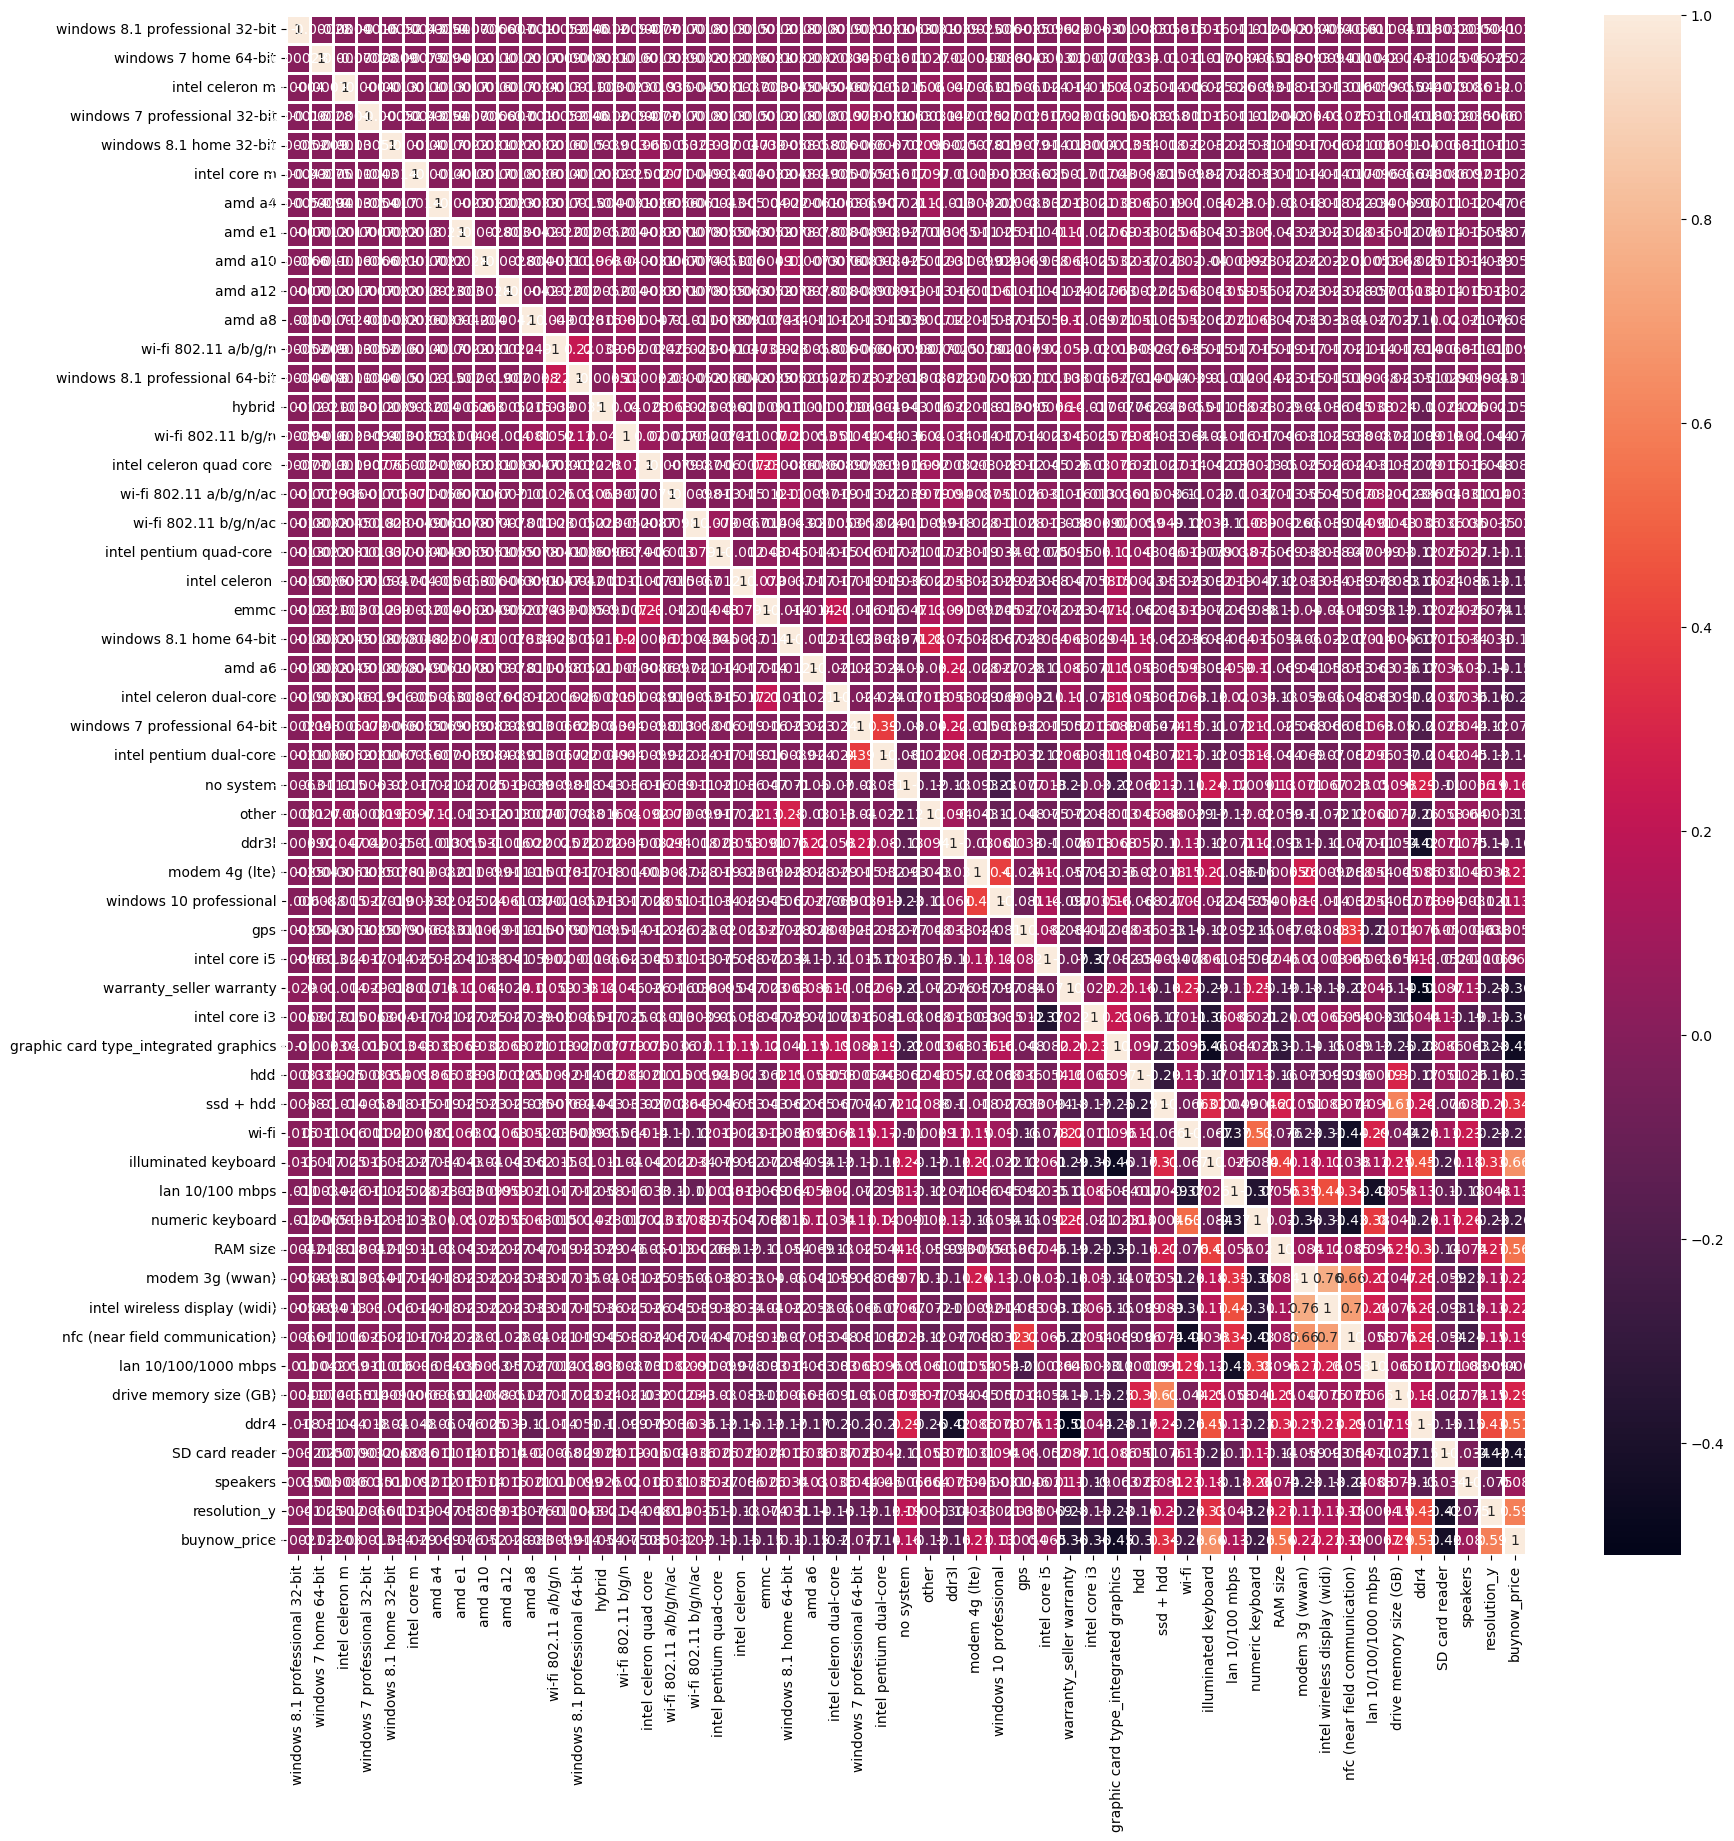

In [53]:
plt.figure(figsize=(20, 20)) # width and height in inches
corr_df = pd.concat([new_df[selected_features], df[label_col]], axis=1)
sns.heatmap(corr_df.corr(),annot=True, lw=1)
plt.show()

illuminated keyboard, RAM size, and resolution_y seem highly correlated with the price.

It's time for the train/val/test data split! We will use validation data in our neural network. In other models, we mainly stick with train and test. We can use the indices of given datasets to properly separate them again as initial datasets.

In [54]:
train_indeces = train_df.dropna().index
val_indeces = val_df.dropna().index
test_indeces = test_df.dropna().index

In [55]:
train_df = new_df.loc[train_indeces]
val_df = new_df.loc[val_indeces]
test_df = new_df.loc[test_indeces]

sklearn machine learning models expect y_train, y_test, y_val in the shape as (row_number, ) instead of (row_number, 1) shape. Hence, we need to apply .ravel() transformation after converting it from DataFrame to NumPy array with .to_numpy().



In [56]:
X_train, X_val, X_test = train_df[selected_features].to_numpy(), val_df[selected_features].to_numpy(), test_df[selected_features].to_numpy()
y_train, y_val, y_test = df.loc[train_indeces][label_col].to_numpy().ravel(), df.loc[val_indeces][label_col].to_numpy().ravel(), df.loc[test_indeces][label_col].to_numpy().ravel()

In [57]:
X_train.shape

(3694, 52)

In [59]:
y_train.shape

(3694,)

# Classical Machine Learning

We will implement and try different machine learning models from Linear Regression to Ensemble Methods. We will measure root-mean-squared-error as instructed. We will scale our data with MaxAbsScaler() from sklearn, which works well with sparse datasets.

Linear : 47861509558509.09
MLP : 719.6561002119159
DecisionTree : 656.6811883268169
RandomForest : 557.0123635130183
GradientBoosting : 526.9818640941238
ExtraTrees : 577.5740215020353


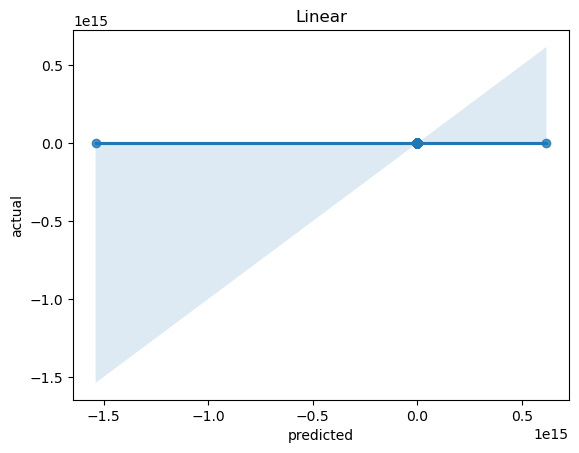

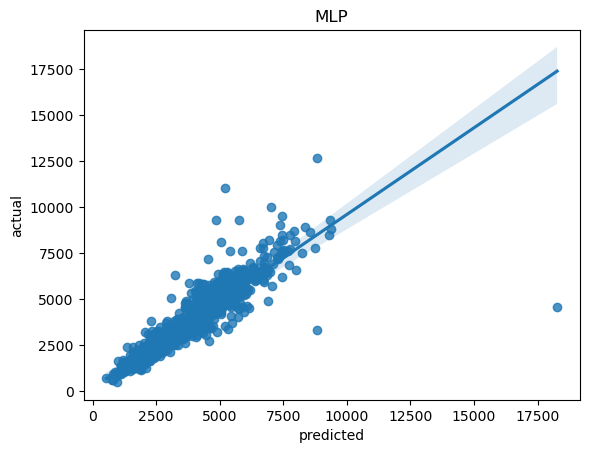

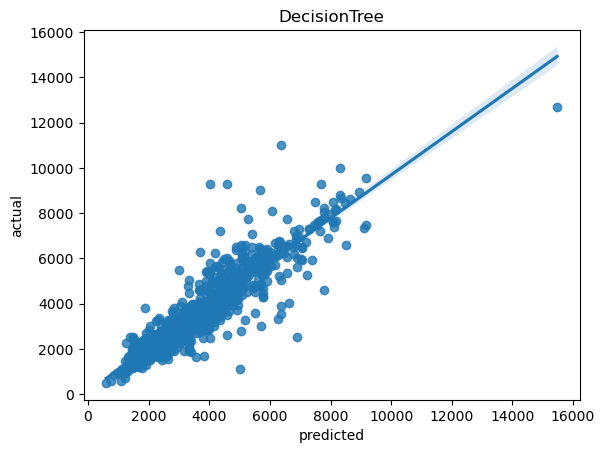

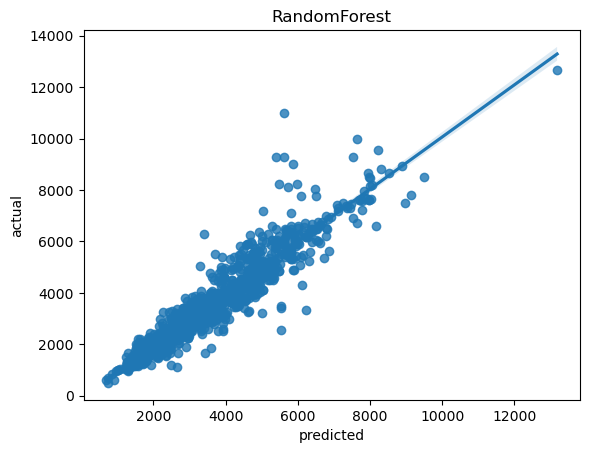

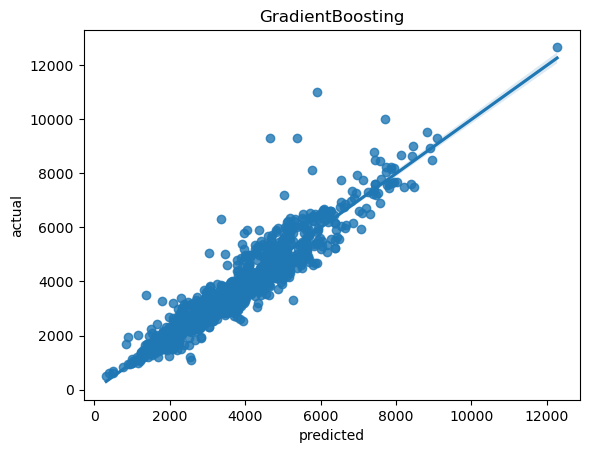

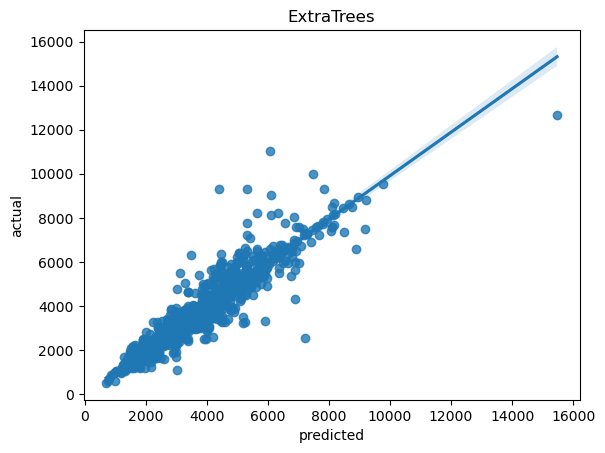

In [60]:
import numpy as np
import pandas as pd

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error 
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import VotingRegressor
from sklearn import linear_model
from sklearn.neural_network import MLPRegressor

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, MaxAbsScaler

import matplotlib.pyplot as plt
from sklearn import tree
import seaborn as sns

def rmse(y_true, y_pred): 
    return mean_squared_error(y_true, y_pred, squared=False)


def regression(regressor_name, regressor):
#     alternative scaler 
#     pipe = make_pipeline(StandardScaler(), regressor)
    pipe = make_pipeline(MaxAbsScaler(), regressor)
    pipe.fit(X_train, y_train) 
    predicted = pipe.predict(X_test)
    rmse_val = rmse(y_test, predicted)
    print(regressor_name, ':', rmse_val)
    pred_df[regressor_name+'_Pred'] = predicted
    plt.figure(regressor_name)
    plt.title(regressor_name)
    plt.xlabel('predicted')
    plt.ylabel('actual')
    sns.regplot(y=y_test,x=predicted)
    
regressors = {
    'Linear' : LinearRegression(),
    'MLP': MLPRegressor(random_state=42, max_iter=500, learning_rate="constant", learning_rate_init=0.6),
    'DecisionTree': DecisionTreeRegressor(max_depth=15, random_state=42),
    'RandomForest': RandomForestRegressor(random_state=42),
    'GradientBoosting': GradientBoostingRegressor(random_state=42, criterion='squared_error',
                                                  loss='squared_error',learning_rate=0.6, warm_start=True),
    'ExtraTrees': ExtraTreesRegressor(n_estimators=100, random_state=42),
}

pred_df = pd.DataFrame(columns =["Actual"])
pred_df["Actual"] = y_test

for key in regressors.keys():
    regression(key, regressors[key])

According to the results and graphics above, RandomForest gives the best result.

# Voting Regressor
We can take the highest performed three models and combine them into a voting mechanism. We can assign weights to their predictions and create a new regressor. Let's try it. It is possible to change weights and have different performance results.

Voting : 504.99219187047


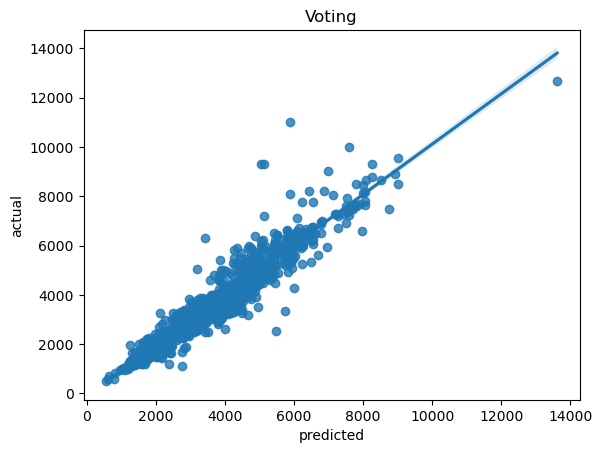

In [61]:
from sklearn.ensemble import VotingRegressor

# classifiers
reg1 = regressors["GradientBoosting"]
reg2 = regressors["ExtraTrees"]
reg3 = regressors["RandomForest"]

# try with different weights
regression("Voting", VotingRegressor([("gb", reg1), ("et", reg2), ("rf", reg3)], weights=[0.4, 0.35, 0.25]))

In [62]:
pred_df

,Actual,Linear_Pred,MLP_Pred,DecisionTree_Pred,RandomForest_Pred,GradientBoosting_Pred,ExtraTrees_Pred,Voting_Pred
0,2369.00,2526.137686,2281.069884,2369.000000,2314.900000,2476.255231,2369.000,2398.377092
1,2299.00,2446.815631,2308.562792,2395.666667,2294.250000,2252.793867,2299.000,2279.330047
2,5999.00,5052.145103,5132.973968,5063.285714,5003.982143,5103.177670,4999.000,5041.916604
3,1299.00,1173.139124,1288.382241,1325.615385,1263.420040,1254.143349,1261.500,1259.037350
4,3329.00,5921.396936,8828.099076,6274.000000,6224.232042,5281.607409,5908.600,5736.710974
...,...,...,...,...,...,...,...,...
1195,5599.00,5738.880269,5631.699560,5809.000000,5679.553571,5979.668993,5674.000,5797.655990
1196,2925.36,3037.405264,2735.188007,2755.001500,2895.425300,2794.022506,2879.000,2849.115327
1197,3799.00,4205.915716,4208.209337,4357.400000,4523.864381,4131.571809,4215.900,4259.159819
1198,5589.00,5040.285765,4914.287883,4872.000000,4913.655000,5201.863482,4471.535,4874.196393


It improves the performance of the RandomForest. We can go ahead with this voting model as our official solution.

In [66]:
pip install tensorflow

     -------------------------------------- 266.3/266.3 MB 1.4 MB/s eta 0:00:00
     ---------------------------------------- 65.5/65.5 kB 1.7 MB/s eta 0:00:00
     -------------------------------------- 895.9/895.9 kB 1.7 MB/s eta 0:00:00
     -------------------------------------- 124.6/124.6 kB 2.4 MB/s eta 0:00:00
     ---------------------------------------- 1.5/1.5 MB 1.9 MB/s eta 0:00:00
     -------------------------------------- 439.2/439.2 kB 2.1 MB/s eta 0:00:00
     ---------------------------------------- 1.7/1.7 MB 1.4 MB/s eta 0:00:00
     ---------------------------------------- 57.5/57.5 kB 1.5 MB/s eta 0:00:00
     ---------------------------------------- 14.2/14.2 MB 3.9 MB/s eta 0:00:00
     ---------------------------------------- 3.7/3.7 MB 1.7 MB/s eta 0:00:00
     ---------------------------------------- 6.0/6.0 MB 1.2 MB/s eta 0:00:00
     -------------------------------------- 177.0/177.0 kB 1.8 MB/s eta 0:00:00
     ------------------------------------ 781.3/

# Deep Learning
Another promising regression algorithm is artificial neural networks. We will create a small one with 4 hidden units since we have small data. We will use a scheduler to decrease the learning rate after a certain epoch number. Also, to prevent overfitting, we will use EarlyStopping.

We will make a comparison between a complex model (two hidden layers) and a base model to see what works best.

In [68]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

from keras import backend as K
tf.random.set_seed(42)

def root_mean_squared_error(y_true, y_pred):
        return K.sqrt(K.mean(K.square(y_pred - y_true))) 

# define learning rate scheduler
def scheduler(epoch, lr):
    if epoch < 30:
        return lr
    else:
        return lr * tf.math.exp(-0.01)
    
# define base model architecture
def build_and_compile_base_model():
    model = keras.Sequential([
        layers.Normalization(axis=-1),
        layers.Dense(64, activation='relu'),
        layers.Dropout(0.2),
        layers.Dense(4, activation='relu'),
        layers.Dense(1)
    ])
    
    model.compile(loss=root_mean_squared_error,
                optimizer=tf.keras.optimizers.Adam(0.005))
    model.build(input_shape=(None,len(selected_features)))
    return model

# define complex model architecture
def build_and_compile_complex_model():
    model = keras.Sequential([
        layers.Normalization(axis=-1),
        layers.Dense(64, activation='relu'),
        layers.Dropout(0.2),
        layers.Dense(8, activation='relu'),
        layers.Dense(8, activation='relu'),
        layers.Dense(1)
    ])
    
    model.compile(loss=root_mean_squared_error,
                optimizer=tf.keras.optimizers.Adam(0.005))
    model.build(input_shape=(None,len(selected_features)))
    return model

In [69]:
dnn_model = build_and_compile_base_model()

In [70]:
dnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 52)               105       
 n)                                                              
                                                                 
 dense (Dense)               (None, 64)                3392      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 4)                 260       
                                                                 
 dense_2 (Dense)             (None, 1)                 5         
                                                                 
Total params: 3,762
Trainable params: 3,657
Non-trainable params: 105
____________________________________________________

In [71]:
scheduler_c = tf.keras.callbacks.LearningRateScheduler(scheduler)
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', min_delta=0, patience=20, verbose=1,
    mode='auto', baseline=None, restore_best_weights=True)

history = dnn_model.fit(
    X_train,
    y_train,
    validation_data=(X_val, y_val),
    callbacks = [scheduler_c, early_stopping],
    verbose=1, epochs=400)

Epoch 1/400
116/116 [==============================] - 2s 8ms/step - loss: 3955.2754 - val_loss: 3888.2371 - lr: 0.0050
Epoch 2/400
116/116 [==============================] - 1s 5ms/step - loss: 3948.6238 - val_loss: 3887.7102 - lr: 0.0050
Epoch 3/400
116/116 [==============================] - 0s 4ms/step - loss: 3950.6013 - val_loss: 3887.1838 - lr: 0.0050
Epoch 4/400
116/116 [==============================] - 1s 5ms/step - loss: 3947.4539 - val_loss: 3886.6567 - lr: 0.0050
Epoch 5/400
116/116 [==============================] - 0s 4ms/step - loss: 3948.7417 - val_loss: 3886.1304 - lr: 0.0050
Epoch 6/400
116/116 [==============================] - 1s 5ms/step - loss: 3943.4329 - val_loss: 3885.6038 - lr: 0.0050
Epoch 7/400
116/116 [==============================] - 0s 4ms/step - loss: 3946.2070 - val_loss: 3885.0774 - lr: 0.0050
Epoch 8/400
116/116 [==============================] - 1s 5ms/step - loss: 3946.3904 - val_loss: 3884.5503 - lr: 0.0050
Epoch 9/400
116/116 [===================

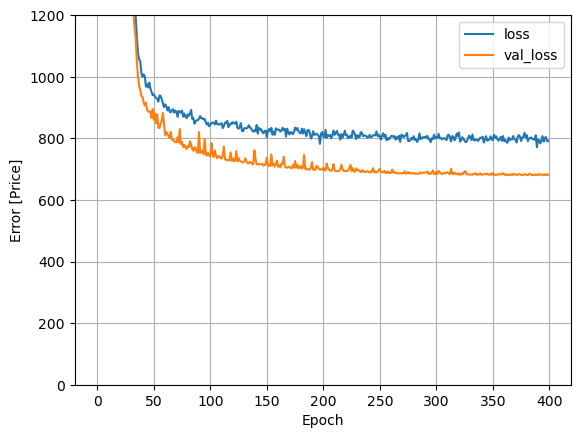

In [72]:
import matplotlib.pyplot as plt

def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.ylim([0, 1200])
    plt.xlabel('Epoch')
    plt.ylabel('Error [Price]')
    plt.legend()
    plt.grid(True)

plot_loss(history)

In [73]:
dnn_model.evaluate(X_test, y_test, verbose=1)


38/38 [==============================] - 0s 3ms/step - loss: 727.2015


727.2015380859375

The base model performs worse than voting regression. Let's check the complex model.



In [74]:
dnn_model = build_and_compile_complex_model()


In [75]:
history = dnn_model.fit(
    X_train,
    y_train,
    validation_data=(X_val, y_val),
    callbacks = [scheduler_c, early_stopping],
    verbose=1, epochs=50)

Epoch 1/50
116/116 [==============================] - 3s 7ms/step - loss: 1608.0138 - val_loss: 1291.6570 - lr: 0.0050
Epoch 2/50
116/116 [==============================] - 1s 5ms/step - loss: 1327.3828 - val_loss: 1272.2826 - lr: 0.0050
Epoch 3/50
116/116 [==============================] - 0s 4ms/step - loss: 1279.4388 - val_loss: 1207.8589 - lr: 0.0050
Epoch 4/50
116/116 [==============================] - 1s 5ms/step - loss: 1228.6334 - val_loss: 1131.3978 - lr: 0.0050
Epoch 5/50
116/116 [==============================] - 0s 4ms/step - loss: 1141.2343 - val_loss: 1050.5560 - lr: 0.0050
Epoch 6/50
116/116 [==============================] - 1s 5ms/step - loss: 1066.2384 - val_loss: 974.7772 - lr: 0.0050
Epoch 7/50
116/116 [==============================] - 1s 4ms/step - loss: 1022.0065 - val_loss: 981.5168 - lr: 0.0050
Epoch 8/50
116/116 [==============================] - 1s 5ms/step - loss: 991.3158 - val_loss: 904.9794 - lr: 0.0050
Epoch 9/50
116/116 [==============================] 

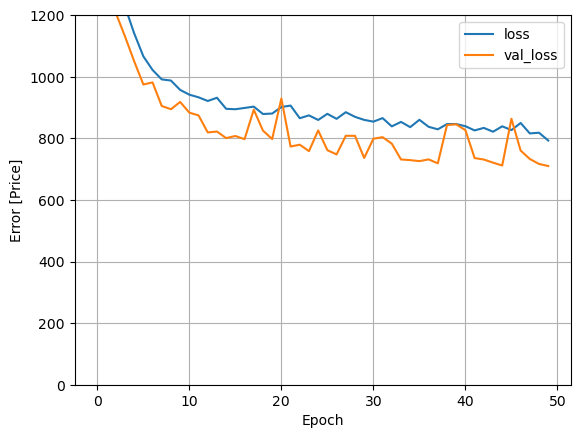

In [76]:
plot_loss(history)

In [77]:
dnn_model.evaluate(X_test, y_test, verbose=1)


38/38 [==============================] - 0s 3ms/step - loss: 748.9888


748.9888305664062

This result is slightly worse than the base model. Probably, our task is not so complex to solve with deep neural networks. So, we choose voting regressor performance as best for this dataset among all explored algorithms.

# Feature Selection
Feature selection hurts the performance of this task. However, it is always best to present all the methods applied through the assignment. Hence, we are representing it also. We used f_regression and RandomForestRegressor.modelimportances to check feature importance. We decided on k=15, but you can change and see the results for different k values.

In [78]:
from sklearn.feature_selection import SelectKBest, f_regression
#Select top 25 features based on f-regression
selector = SelectKBest(f_regression, k =25)
X = new_df[selected_features].to_numpy()
y = df[label_col].to_numpy().ravel()
selector.fit(X, y)
cols = new_df[selected_features].columns[selector.get_support()].to_list()
cols

['intel celeron ',
 'emmc',
 'amd a6',
 'intel celeron dual-core',
 'intel pentium dual-core',
 'no system',
 'ddr3l',
 'modem 4g (lte)',
 'warranty_seller warranty',
 'intel core i3',
 'graphic card type_integrated graphics',
 'hdd',
 'ssd + hdd',
 'wi-fi',
 'illuminated keyboard',
 'lan 10/100 mbps',
 'numeric keyboard',
 'RAM size',
 'modem 3g (wwan)',
 'intel wireless display (widi)',
 'nfc (near field communication)',
 'drive memory size (GB)',
 'ddr4',
 'SD card reader',
 'resolution_y']

In [79]:
X_train, X_val, X_test = train_df[cols].to_numpy(), val_df[cols].to_numpy(), test_df[cols].to_numpy()
y_train, y_val, y_test = df.loc[train_indeces][label_col].to_numpy().ravel(), df.loc[val_indeces][label_col].to_numpy().ravel(), df.loc[test_indeces][label_col].to_numpy().ravel()

RandomForest : 689.5841293235402


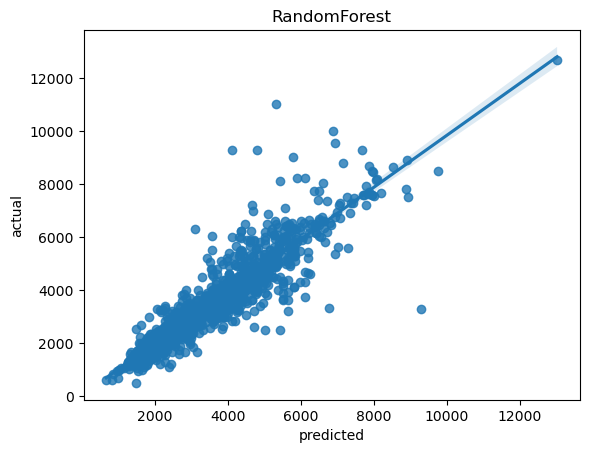

In [80]:
regression('RandomForest', regressors['RandomForest'])


The complete model with selected_features has a better RMSE score of around 557.



Feature: windows 8.1 professional 32-bit , Score: 4.973371134104074e-06
Feature: windows 7 home 64-bit , Score: 0.0
Feature: intel celeron m , Score: 3.943939831647907e-05
Feature: windows 7 professional 32-bit , Score: 0.0
Feature: windows 8.1 home 32-bit , Score: 5.046719425470301e-05
Feature: intel core m , Score: 0.00020479544394336958
Feature: amd a4 , Score: 0.00023012608983633218
Feature: amd e1 , Score: 7.565799456190145e-05
Feature: amd a10 , Score: 0.00019426092177305212
Feature: amd a12 , Score: 0.00024066812922089715
Feature: amd a8 , Score: 0.00017034014453873547
Feature: wi-fi 802.11 a/b/g/n , Score: 0.00022288687987535765
Feature: windows 8.1 professional 64-bit , Score: 0.001235310470718396
Feature: hybrid , Score: 0.000499177576732892
Feature: wi-fi 802.11 b/g/n , Score: 0.0001526397408483957
Feature: intel celeron quad core  , Score: 7.357701733413612e-05
Feature: wi-fi 802.11 a/b/g/n/ac , Score: 0.001067458351317804
Feature: wi-fi 802.11 b/g/n/ac , Score: 0.000596049

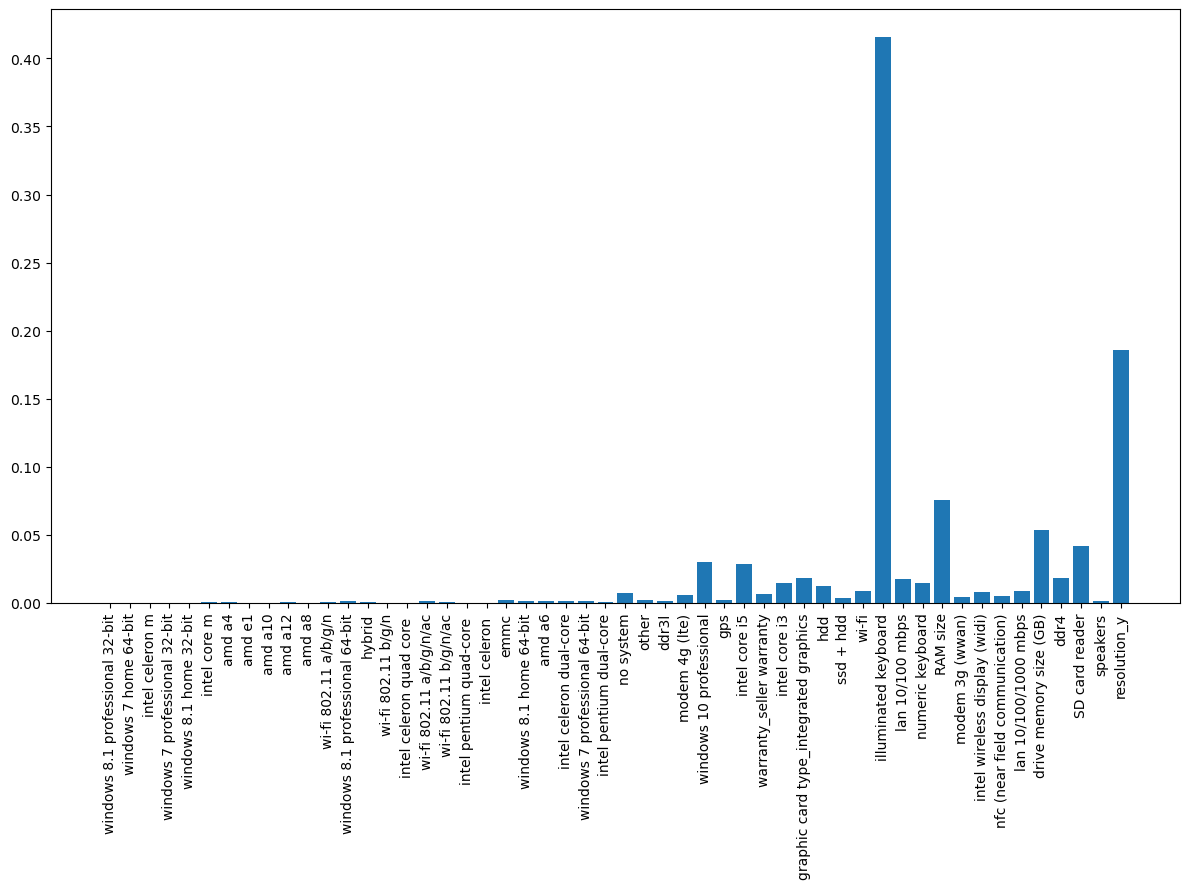

In [81]:
X = new_df[selected_features].values
X_train, X_val, X_test = train_df[selected_features].to_numpy(), val_df[selected_features].to_numpy(), test_df[selected_features].to_numpy()
y_train, y_val, y_test = df.loc[train_indeces][label_col].to_numpy().ravel(), df.loc[val_indeces][label_col].to_numpy().ravel(), df.loc[test_indeces][label_col].to_numpy().ravel()
model = RandomForestRegressor(random_state=42)
# fit the model
model.fit(X_train, y_train)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print(f"Feature: {selected_features[i]} , Score: {v}")
# plot feature importance
plt.figure(figsize=(12, 9)) # width and height in inches
plt.bar(selected_features, importance)
plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

In [82]:
feats_w_highest_importance = np.array(selected_features)[importance > 0.02].tolist()
feats_w_highest_importance

['windows 10 professional',
 'intel core i5',
 'illuminated keyboard',
 'RAM size',
 'drive memory size (GB)',
 'SD card reader',
 'resolution_y']

In [83]:
X_train, X_val, X_test = train_df[feats_w_highest_importance].to_numpy(), val_df[feats_w_highest_importance].to_numpy(), test_df[feats_w_highest_importance].to_numpy()
y_train, y_val, y_test = df.loc[train_indeces][label_col].to_numpy().ravel(), df.loc[val_indeces][label_col].to_numpy().ravel(), df.loc[test_indeces][label_col].to_numpy().ravel()

RandomForest : 712.3894667966214


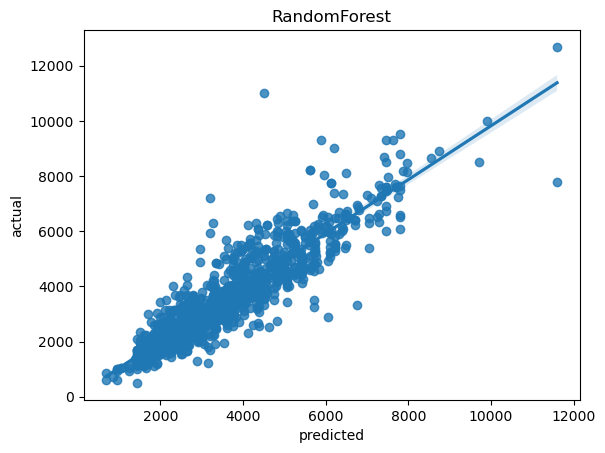

In [84]:
regression('RandomForest', regressors['RandomForest'])


Still, the complete feature set provides better results compared to features with the highest importance.